In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("dailyboardingtotals.csv")
df

,service_date,day_type,bus,rail_boardings,total_rides
0,02/01/2010,W,1091041,648428,1739469
1,07/15/2006,A,603018,412144,1015162
2,08/26/2017,A,487453,446049,933502
3,12/25/2007,U,249699,111582,361281
4,07/08/2005,W,950222,591325,1541547
...,...,...,...,...,...
8881,04/26/2025,A,428587,317347,745934
8882,04/27/2025,U,329874,245932,575806
8883,04/28/2025,W,604201,393731,997932
8884,04/29/2025,W,638090,439903,1077993


In [11]:
df_dates = pd.to_datetime(df.service_date, format='%m/%d/%Y')
df_dates


dates_2024 = []
for d in df_dates:
    if d.year == 2024:
        dates_2024.append(d)
print(len(dates_2024))

366


In [12]:
df_sorted = df.sort_values(by='total_rides', ascending=True)
df_sorted['day_of_week'] = pd.to_datetime(df_sorted['service_date']).dt.day_name()

#print(df_sorted.head())
#print(df_sorted.tail())

avg_rides_per_day = df_sorted.groupby('day_of_week')['total_rides'].mean().sort_values()
print(avg_rides_per_day)

avg_rides_per_month = df_sorted.groupby(df_sorted['service_date'].str[:3])['total_rides'].mean()
print(avg_rides_per_month)


day_of_week
Sunday       6.371006e+05
Saturday     8.838750e+05
Monday       1.330143e+06
Friday       1.407003e+06
Thursday     1.412128e+06
Wednesday    1.426704e+06
Tuesday      1.428025e+06
Name: total_rides, dtype: float64
service_date
01/    1.116058e+06
02/    1.207588e+06
03/    1.215641e+06
04/    1.210148e+06
05/    1.231138e+06
06/    1.250476e+06
07/    1.211637e+06
08/    1.229302e+06
09/    1.310005e+06
10/    1.330739e+06
11/    1.215152e+06
12/    1.094890e+06
Name: total_rides, dtype: float64


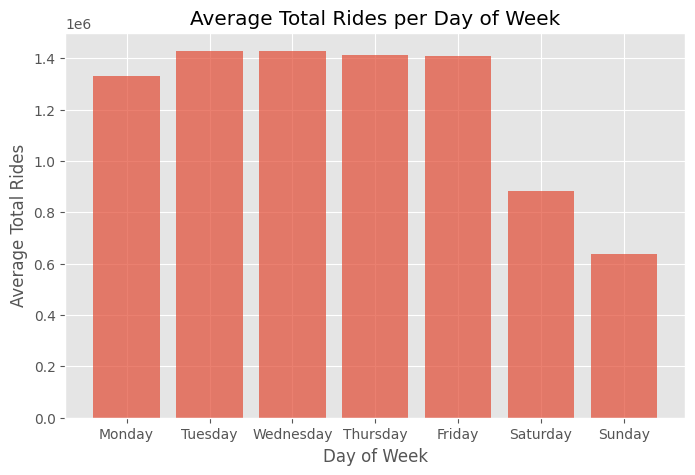

In [13]:
import matplotlib.pyplot as plt

# Ensure the days are ordered as in a typical week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_rides_per_day_ordered = avg_rides_per_day.reindex(ordered_days)

plt.figure(figsize=(8,5))
plt.bar(avg_rides_per_day_ordered.index, avg_rides_per_day_ordered.values, alpha=0.7)
plt.xlabel('Day of Week')
plt.ylabel('Average Total Rides')
plt.title('Average Total Rides per Day of Week')
plt.grid(True)
plt.style.use('ggplot')
plt.show()

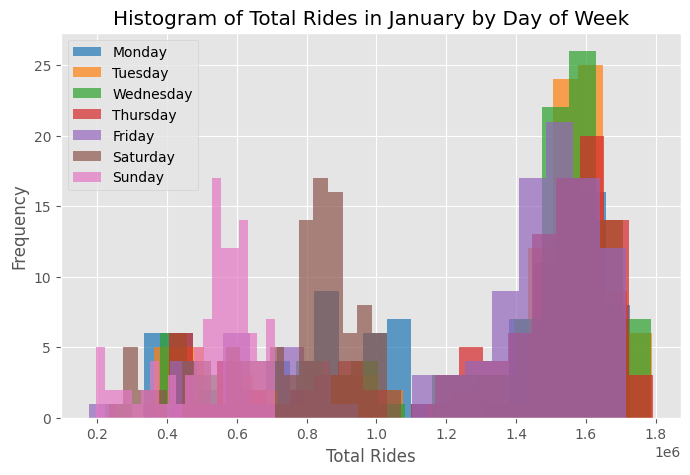

In [14]:
# Assign a color to each day of the week
colors = {
    'Monday': 'tab:blue',
    'Tuesday': 'tab:orange',
    'Wednesday': 'tab:green',
    'Thursday': 'tab:red',
    'Friday': 'tab:purple',
    'Saturday': 'tab:brown',
    'Sunday': 'tab:pink'
}

# Filter for January data and add day_of_week column
janData = df[pd.to_datetime(df['service_date']).dt.month == 1].copy()
janData['day_of_week'] = pd.to_datetime(janData['service_date']).dt.day_name()

plt.style.use('ggplot')
plt.figure(figsize=(8,5))
for day in ordered_days:
    subset = janData[janData['day_of_week'] == day]
    plt.hist(subset['total_rides'], bins=20, alpha=0.7, label=day, color=colors[day])

plt.xlabel('Total Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rides in January by Day of Week')
plt.legend()
plt.grid(True)
plt.show()


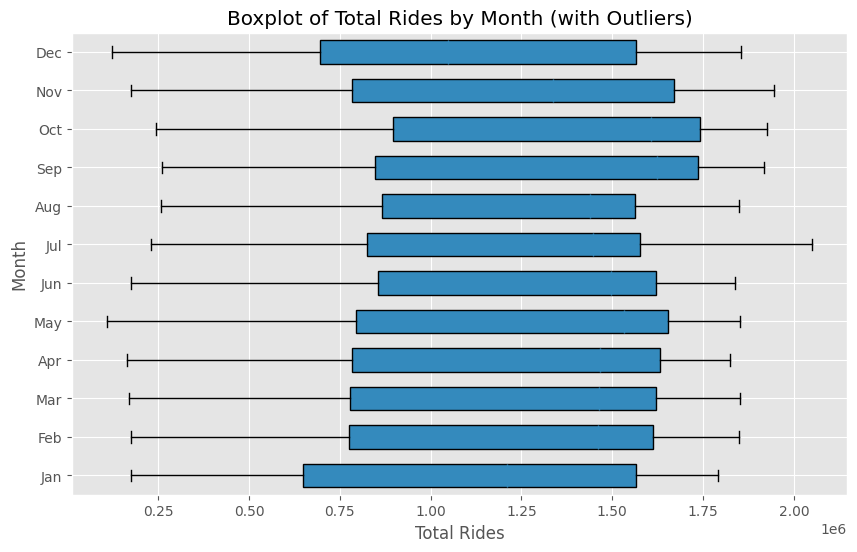

In [19]:
# Add 'month' column with 3-letter abbreviations to df if not already present
df['month'] = pd.to_datetime(df['service_date']).dt.strftime('%b')

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
positions = range(len(ordered_months))
for i, month in enumerate(ordered_months):
    subset = df[df['month'] == month]
    if not subset.empty:
        plt.boxplot(
            subset['total_rides'],
            vert=False,
            positions=[i],
            widths=0.6,
            patch_artist=True,
            #boxprops=dict(facecolor=month_colors[month]),
            flierprops=dict(marker='*', markerfacecolor='black', markersize=8, linestyle='none')  # asterisk for outliers
        )
plt.yticks(positions, ordered_months)
plt.xlabel('Total Rides')
plt.ylabel('Month')
plt.title('Boxplot of Total Rides by Month (with Outliers)')
plt.grid(True)
plt.show()


In [20]:
# Add 'month' column with 3-letter abbreviations to df if not already present
df2020 = df[df['service_date'].str.contains('2020')]
df2021 = df[df['service_date'].str.contains('2021')]
df2022 = df[df['service_date'].str.contains('2022')]
df2023 = df[df['service_date'].str.contains('2023')]
df2024 = df[df['service_date'].str.contains('2024')]
totaldf = pd.concat([df2020, df2021, df2022, df2023, df2024])

def graph(dfdata):
    plt.style.use('ggplot')
    plt.figure(figsize=(10,6))
    positions = range(len(ordered_months))
    for i, month in enumerate(ordered_months):
        subset = dfdata[dfdata['month'] == month]
        if not subset.empty:
            plt.boxplot(
                subset['total_rides'],
                vert=False,
                positions=[i],
                widths=0.6,
                patch_artist=True,
                boxprops=dict(facecolor=month_colors[month]),
                flierprops=dict(marker='*', markerfacecolor='black', markersize=8, linestyle='none')  # asterisk for outliers
            )
    plt.yticks(positions, ordered_months)
    plt.xlabel('Total Rides')
    plt.ylabel('Month')
    plt.title(f'Boxplot of Total Rides by Month (with Outliers) - {dfdata["service_date"].str[6:11].unique()[0]}')
    plt.grid(True)
    plt.show()

graph(df2020)
graph(df2021)
graph(df2022)
graph(df2023)
graph(df2024)


NameError: name 'month_colors' is not defined

<Figure size 1000x600 with 0 Axes>

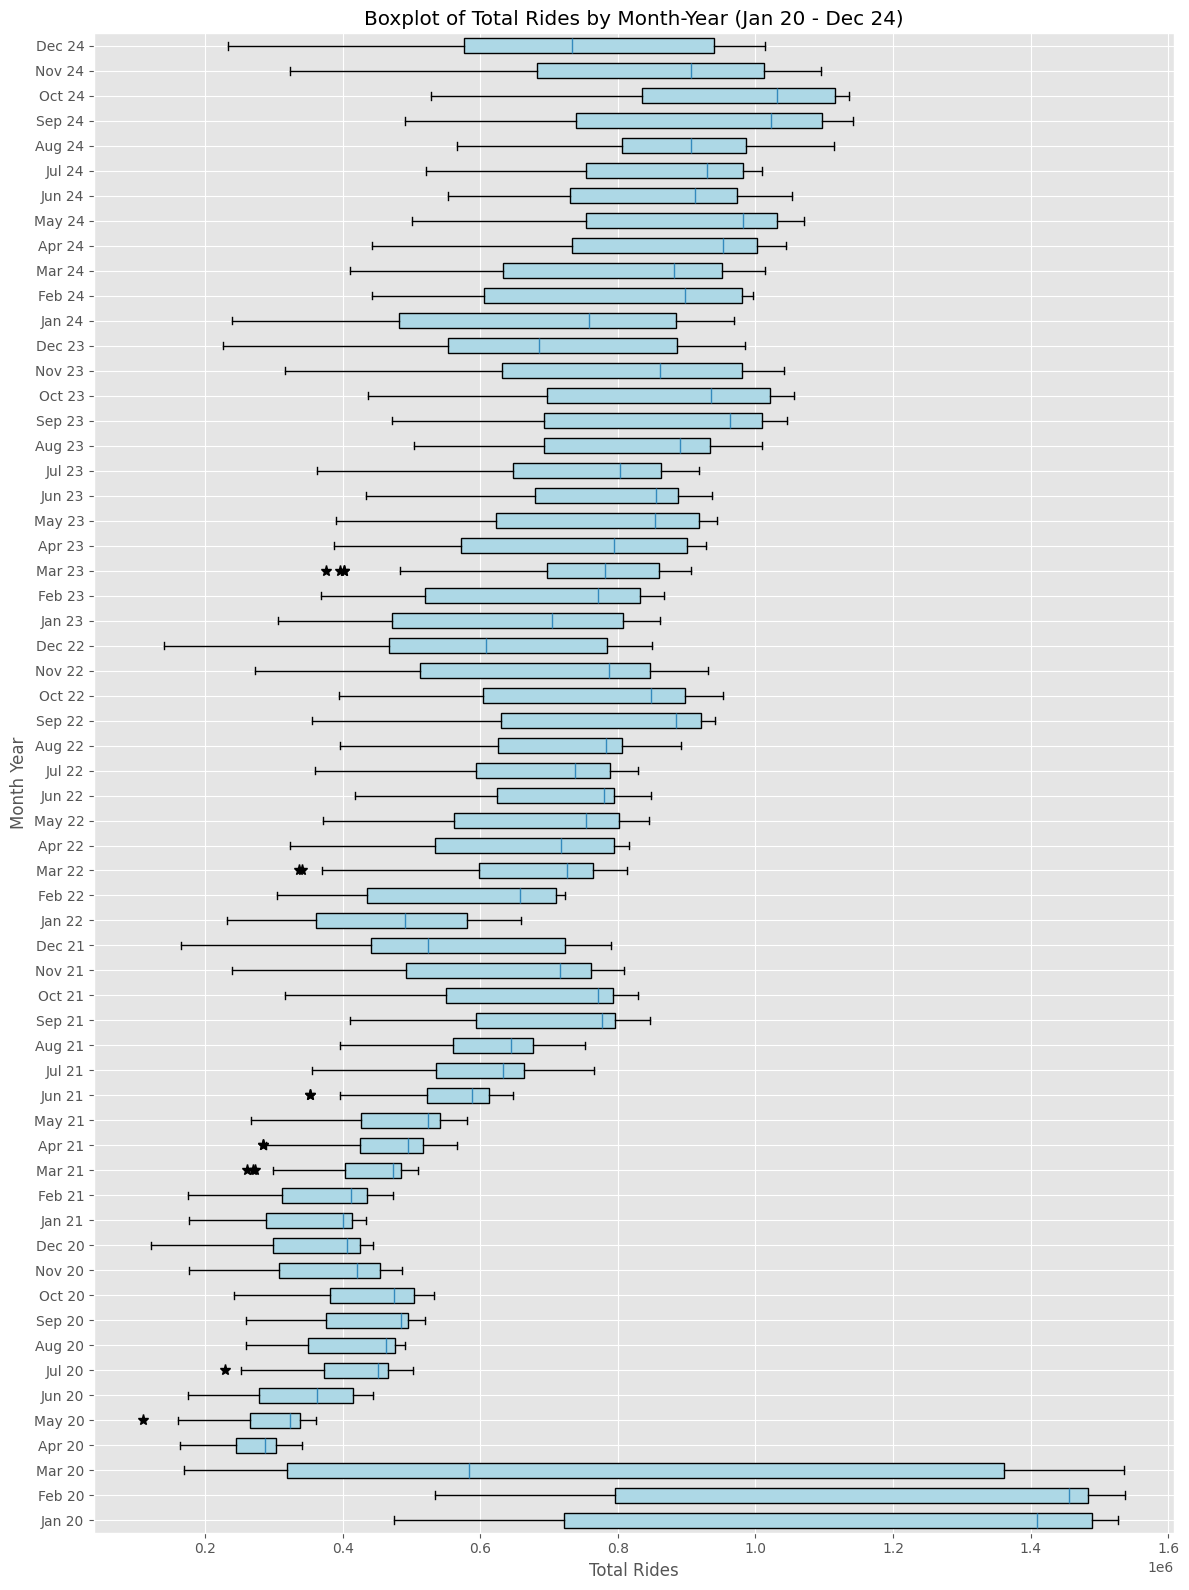

In [ ]:
# Create 'month_year' column in totaldf
totaldf['month_year'] = pd.to_datetime(totaldf['service_date']).dt.strftime('%b %y')

# Get all unique month_years in order
ordered_month_years = sorted(totaldf['month_year'].unique(), key=lambda x: pd.to_datetime(x, format='%b %y'))

plt.style.use('ggplot')
plt.figure(figsize=(12, 16))
positions = range(len(ordered_month_years))

for i, my in enumerate(ordered_month_years):
    subset = totaldf[totaldf['month_year'] == my]
    if not subset.empty:
        plt.boxplot(
            subset['total_rides'],
            vert=False,
            positions=[i],
            widths=0.6,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            flierprops=dict(marker='*', markerfacecolor='black', markersize=8, linestyle='none')
        )

plt.yticks(positions, ordered_month_years)
plt.xlabel('Total Rides')
plt.ylabel('Month Year')
plt.title('Boxplot of Total Rides by Month-Year (Jan 20 - Dec 24)')
plt.grid(True)
plt.tight_layout()
plt.show()


01/01/2001 12/31/2024
01/01/2021 12/31/2024
               avg_rides week_start_date
year week                               
2021 0     227051.500000      2021-01-01
     1     368620.857143      2021-01-03
     2     366809.000000      2021-01-10
     3     353829.428571      2021-01-17
     4     358765.571429      2021-01-24
...                  ...             ...
2025 13    872089.857143      2025-03-30
     14    905833.857143      2025-04-06
     15    905241.000000      2025-04-13
     16    911343.428571      2025-04-20
     17    929856.000000      2025-04-27

[230 rows x 2 columns]


/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_50716/772651296.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2025['year'] = pd.to_datetime(df_2021_2025['service_date']).dt.year
/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_50716/772651296.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2025['week'] = pd.to_datetime(df_2021_2025['service_date']).dt.strftime('%U').astype(int)


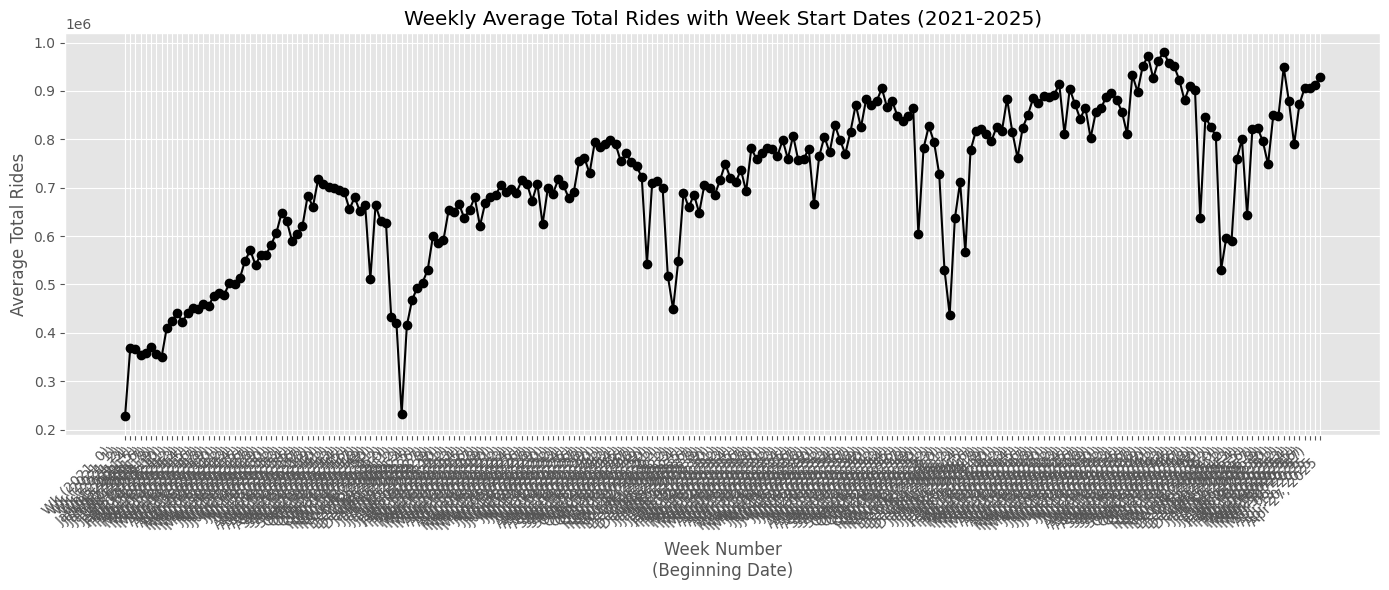

In [39]:
# # Create 'month_year' column in totaldf
# totaldf['month_year'] = pd.to_datetime(totaldf['service_date']).dt.strftime('%b %y')

# # Get all unique month_years in order
# ordered_month_years = sorted(totaldf['month_year'].unique(), key=lambda x: pd.to_datetime(x, format='%b %y'))

# plt.style.use('ggplot')
# plt.figure(figsize=(12, 16))
# positions = range(len(ordered_month_years))

# for i, my in enumerate(ordered_month_years):
#     subset = totaldf[totaldf['month_year'] == my]
#     if not subset.empty:
#         # Calculate weekly average for the month-year
#         week_avgs = subset.groupby(pd.to_datetime(subset['service_date']).dt.isocalendar().week)['total_rides'].mean()
#         plt.plot(week_avgs.values, [i]*len(week_avgs), marker='o', linestyle='-', color='black', label='Weekly Avg' if i == 0 else "")

# plt.yticks(positions, ordered_month_years)
# plt.xlabel('Total Rides')
# plt.ylabel('Month Year')
# plt.title('Boxplot of Total Rides by Month-Year (Jan 20 - Dec 24)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# Filter df for data from 2021 to 2025 (inclusive)
print(df['service_date'].min(), df['service_date'].max())
df_2021_2025 = df[
    (pd.to_datetime(df['service_date']) >= pd.Timestamp('2021-01-01'))]

print(df_2021_2025['service_date'].min(), df_2021_2025['service_date'].max())


# Group by year and week number using pandas' DatetimeIndex (not ISO)
df_2021_2025['year'] = pd.to_datetime(df_2021_2025['service_date']).dt.year
df_2021_2025['week'] = pd.to_datetime(df_2021_2025['service_date']).dt.strftime('%U').astype(int)

week_info = df_2021_2025.groupby(['year', 'week']).agg(
    avg_rides=('total_rides', 'mean'),
    week_start_date=('service_date', lambda x: pd.to_datetime(x).min())
).reset_index().sort_values(['year', 'week']).set_index(['year', 'week'])
print(week_info)
# Format x-tick labels as "Wk {week_number}\n{start_date}"
week_labels = [
    f"Wk {week}\n{row['week_start_date'].strftime('%b %d, %Y')}"
    for week, row in week_info.iterrows()
]

plt.figure(figsize=(14, 6))
x = range(len(week_info))
plt.plot(x, week_info['avg_rides'].values, marker='o', linestyle='-', color='k')
plt.xlabel('Week Number\n(Beginning Date)')
plt.ylabel('Average Total Rides')
plt.title('Weekly Average Total Rides with Week Start Dates (2021-2025)')
plt.xticks(x, week_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.bus.value_counts()

bus
558905     2
1040926    2
972155     2
858709     2
981933     2
          ..
930494     1
1061512    1
785144     1
535013     1
632346     1
Name: count, Length: 8846, dtype: int64

In [ ]:
minRides = df['total_rides'].min()
minDate = df.loc[df['total_rides'].idxmin(), 'service_date']
minStation = df.loc[df['total_rides'].idxmin(), 'bus']

maxRides = df['total_rides'].max()
maxDate = df.loc[df['total_rides'].idxmax(), 'service_date']
maxStation = df.loc[df['total_rides'].idxmax(), 'bus']

freq = 0
for bus in df['bus']:
    if int(bus) == minStation:
        freq += 1

print("station " + str(minStation) + " has " + str(freq) + " rides")

print("minimum rides " +  str(minRides) + " on " + str(minDate) + " at " + str(minStation))
print("maximum rides " +  str(maxRides) + " on " + str(maxDate) + " at " + str(maxStation))

station 86503 has 1 rides
minimum rides 110047 on 05/31/2020 at 86503
maximum rides 2049519 on 07/03/2008 at 1143777


In [ ]:
currTestYear = 2001
for i in range(25):
    currTestYear += 1
    dates_curr_year = []
    for d in df_dates:
        if d.year == currTestYear:
            dates_curr_year.append(d)
    print(f"Number of dates in {currTestYear}: {len(dates_curr_year)}")

2001

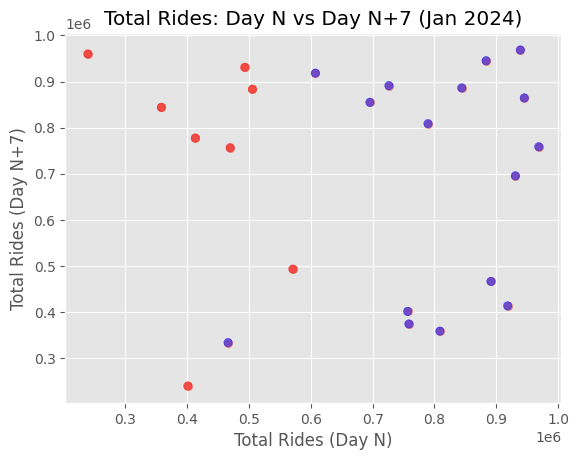

In [ ]:
#plt.scatter(df['service_date'], df['total_rides'], alpha=0.5)

df_2024 = df[df['service_date'].str.contains('2024')]
df_jan2024 = df_2024[df_2024['service_date'].str.startswith('01/')]
# Prepare data for scatterplot: x = total_rides of day N, y = total_rides of day N+7
rides_today = df_jan2024['total_rides'].values[:-7]
rides_nextweek = df_jan2024['total_rides'].values[7:]

plt.scatter(rides_today, rides_nextweek, alpha=0.5)
plt.xlabel('Total Rides (Day N)')
plt.ylabel('Total Rides (Day N+7)')
# Color by day_type: 'W' (Weekday) = blue, 'U' and 'A' (Weekend/Holiday) = red
colors = df_jan2024['day_type'].iloc[:-7].map(lambda x: 'blue' if x == 'W' else 'red')
plt.title('Total Rides: Day N vs Day N+7 (Jan 2024)')
plt.grid(True)
plt.scatter(rides_today, rides_nextweek, c=colors, alpha=0.5)
plt.show()


/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_45645/2701063138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan2024['lag7'] = df_jan2024.shift(3).total_rides


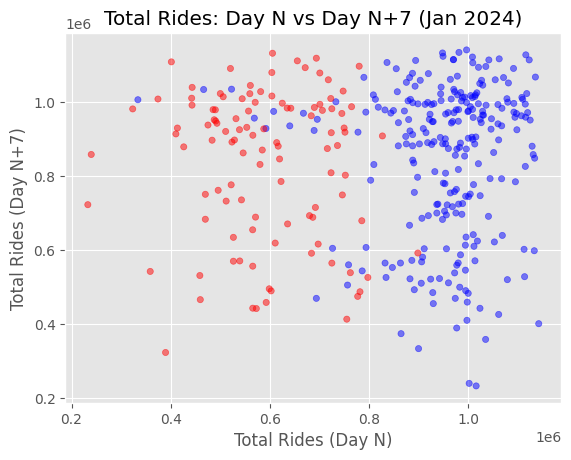

In [ ]:
df_2024 = df[df['service_date'].str.contains('2024')]
df_jan2024 = df_2024#[df_2024['service_date']]#.str.startswith('02/')]
df_jan2024['lag7'] = df_jan2024.shift(3).total_rides
df_jan2024.plot.scatter('total_rides', 'lag7', alpha=0.5, c=df_jan2024['day_type'].map(lambda x: 'blue' if x == 'W' else 'red'))
plt.xlabel('Total Rides (Day N)')
plt.ylabel('Total Rides (Day N+7)')
plt.title('Total Rides: Day N vs Day N+7 (Jan 2024)')
plt.grid(True)
plt.show()

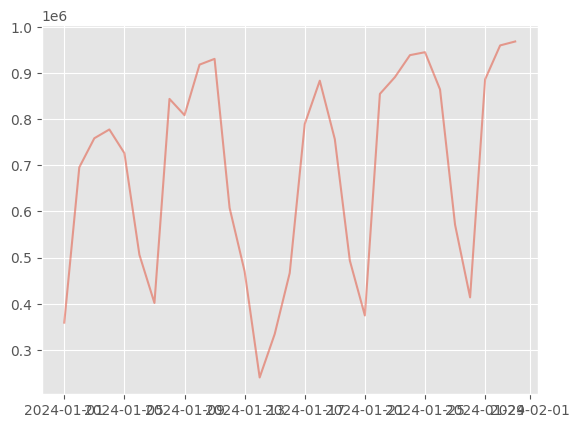

In [46]:
df['service_date'] = pd.to_datetime(df['service_date'], format='%m/%d/%Y')
df2024 = df[df['service_date'].dt.year == 2024].dropna()
df2024jan = df2024[df2024['service_date'].dt.month == 1]
df2024jan = df2024jan.sort_values(by='service_date')

plt.plot(df2024jan['service_date'], df2024jan['total_rides'], alpha=0.5)

In [45]:
df2024jan

,service_date,day_type,bus,rail_boardings,total_rides,month
362,2024-01-13,A,286037,183824,469861,Jan
616,2024-01-17,W,466850,322741,789591,Jan
953,2024-01-27,A,349068,222033,571101,Jan
1382,2024-01-12,W,368347,239249,607596,Jan
1522,2024-01-05,W,445488,280897,726385,Jan
1580,2024-01-24,W,549204,389714,938918,Jan
2229,2024-01-06,A,308872,196983,505855,Jan
2338,2024-01-19,W,462986,293650,756636,Jan
2401,2024-01-09,W,478685,330005,808690,Jan
2891,2024-01-20,A,301556,191705,493261,Jan
